In [0]:
import pandas as pd
import numpy as np
import os, time, pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)

## Com obrir arxius
Primer s'han de carregar des de l'ordenador amb el codi de baix

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
f = 'Switch01_Data.xlsx'
df = pd.read_excel(f)

SturingStand = df.iloc[0:6338, 0:2]
SturingStand.rename( columns = {6338:"Data"})

SturingStand2 = df.iloc[:, 0:2]
SturingStand2.rename( columns = {6338:"Data"})

In [0]:
df.dropna(axis = 'columns', how = 'all')

In [0]:
SturingStand2.dropna(axis = 'index', how = 'all')

In [0]:
y = [3,2,2,1,5,6]

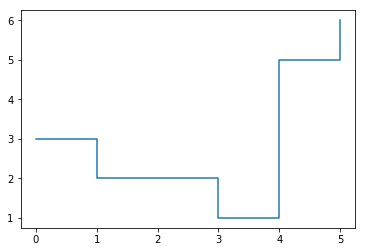

In [0]:
plt.step(range(6),y,where='post')
plt.show()

In [0]:
Sw_Meetdata = []
Sw_Samen = []
Sw_Bouwstenen = []

f = ['Switch01_Data.xlsx']
columns = ['ControleLinks', 'ControleRechts', 'SturingLinks', 'SturingRetchs','OmloopTijdLinks_Motorstroom','OmloopTijdRechts_Motorstroom','OmloopTijdRechts_Relais']


for file in f:
  Sw_Meetdata.append((pd.read_excel(file,sheet_name="Meetdata")))
  Sw_Meetdata[-1] = Sw_Meetdata[-1].dropna(axis = 'columns', how = 'all')
  
  Sw_Samen.append(pd.read_excel(file,sheet_name='Samenvattende Waarde'))
  Sw_Samen[-1] = Sw_Samen[-1].dropna(axis = 'columns', how = 'all')
  
  Sw_Bouwstenen.append(pd.read_excel(file,sheet_name='Bouwstenen'))
  Sw_Bouwstenen[-1] = Sw_Bouwstenen[-1].dropna(axis = 'columns', how = 'all')
  
  
print('end')

end


In [0]:
Timedelta = Sw_Bouwstenen[0]["Sturing Stand"].iloc[:] - Sw_Bouwstenen[0]["Sturing Stand"].iloc[0]

In [0]:
 Sw_Bouwstenen[0]

In [0]:
df = pd.DataFrame({"A":[0,1,0], "B":[2,0,5]}, columns=list('AB'))
df

,A,B
0,0,2
1,1,0
2,0,5


In [0]:
df.loc[[True, True, True], 'B'] = np.nan
df

,A,B
0,0,NaN
1,1,NaN
2,0,NaN


In [0]:
Sw_Bouwstenen[0].loc[Sw_Bouwstenen[0][6338] == "Sturing Links", 6338] = -1
Sw_Bouwstenen[0].loc[Sw_Bouwstenen[0][6338] == "Sturing Rechts", 6338] = 1
Sw_Bouwstenen[0].loc[Sw_Bouwstenen[0][6338] == "Sturing Onbekend", 6338] = 0

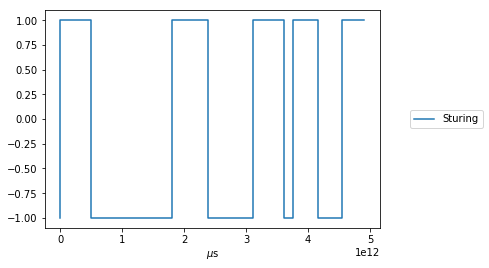

In [0]:
plt.step(Timedelta[0:10], d[0:10], label= 'Sturing')
plt.xlabel('$\mu$s')
plt.legend(loc = "center", bbox_to_anchor=(1.2, 0.5))

In [0]:
Timedelta[1]

Timedelta('0 days 00:08:20.559000')

In [0]:
plt.show()

In [0]:
MeetdataNames = ['ControlLeftDate', 'ControlLeft', 'ControlRightDate', 'ControlRight',
       'SteeringRightDate', 'SteeringRight', 'SteeringLeftDate',
       'SteeringLeft', 'MotorCurrentDate', 'MotorCurrent']

SamenNames = ['EnergySurfaceLeftDate', 'EnergySurfaceLeft', 'EnergySurfaceRightDate',
       'EnergySurfaceRight', 'StartPeakLeftDate', 'StartPeakLeft',
       'StartPeakRightDate', 'StartPeakRight', 'MaxTransitionLeftDate',
       'MaxTransitionLeft', 'MaxTransitionRightDate', 'MaxTransitionRight',
       'MotorTransitionTimeLeftDate', 'MotorTransitionTimeLeft',
       'MotorTransitionTimeRightDate', 'MotorTransitionTimeRight',
       'RelayTransitionTimeRightDate', 'RelayTransitionTimeRight',
       'RelayTransitionTimeLeftDate', 'RelayTransitionTimeLeft',
       'TimeEndMotorCurrentControlLeftDate', 'TimeEndMotorCurrentControlLeft',
       'TimeEndMotorCurrentControlRightDate',
       'TimeEndMotorCurrentControlRight', 'TimeSteeringMotorCurrentLeftDate',
       'TimeSteeringMotorCurrentLeft', 'TimeSteeringMotorCurrentRightDate',
       'TimeSteeringMotorCurrentRight', 'ControlOutTimeDate',
       'ControlOutTime']

BouwstenenNames = ['ControlPositionDate', 'ControlPosition', 'SteeringCommandDate',
       'SteeringCommand', 'MotorCurrentActiveDate', 'MotorCurrentActive']

BouwstenenVariableNames = ['ControlPosition', 'SteeringCommand',
                           'MotorCurrentActive']

In [0]:
Names = MeetdataNames + SamenNames + BouwstenenNames 
print(Names)

['ControlLeftDate', 'ControlLeft', 'ControlRightDate', 'ControlRight', 'SteeringRightDate', 'SteeringRight', 'SteeringLeftDate', 'SteeringLeft', 'MotorCurrentDate', 'MotorCurrent', 'EnergySurfaceLeftDate', 'EnergySurfaceLeft', 'EnergySurfaceRightDate', 'EnergySurfaceRight', 'StartPeakLeftDate', 'StartPeakLeft', 'StartPeakRightDate', 'StartPeakRight', 'MaxTransitionLeftDate', 'MaxTransitionLeft', 'MaxTransitionRightDate', 'MaxTransitionRight', 'MotorTransitionTimeLeftDate', 'MotorTransitionTimeLeft', 'MotorTransitionTimeRightDate', 'MotorTransitionTimeRight', 'RelayTransitionTimeRightDate', 'RelayTransitionTimeRight', 'RelayTransitionTimeLeftDate', 'RelayTransitionTimeLeft', 'TimeEndMotorCurrentControlLeftDate', 'TimeEndMotorCurrentControlLeft', 'TimeEndMotorCurrentControlRightDate', 'TimeEndMotorCurrentControlRight', 'TimeSteeringMotorCurrentLeftDate', 'TimeSteeringMotorCurrentLeft', 'TimeSteeringMotorCurrentRightDate', 'TimeSteeringMotorCurrentRight', 'ControlOutTimeDate', 'ControlOut

In [0]:
BouwstenenVariableNames = ['ControlPosition', 'SteeringCommand',
                           'MotorCurrentActive']

def toNumber(dataframe, variableName):
  resultdf = dataframe[variableName].copy()
  
  if (variableName == 'ControlPosition'):
    resultdf.loc[dataframe[variableName] == "Links Controle"] = -1
    resultdf.loc[dataframe[variableName] == "Rechts Controle"] = 1
    resultdf.loc[dataframe[variableName] == "Uit Controle"] = 0
    
  if (variableName == 'SteeringCommand'):
    resultdf.loc[dataframe[variableName] == "Sturing Links"] = -1
    resultdf.loc[dataframe[variableName] == "Sturing Rechts"] = 1
    resultdf.loc[dataframe[variableName] == "Sturing Onbekend"] = 0
    
  if (variableName == 'MotorCurrentActive'):
    resultdf.loc[dataframe[variableName] == "Motorstroom Actief"] = 1
    resultdf.loc[dataframe[variableName] == "Geen Motorstroom"] = 0
  return resultdf

def convertToNumber(dataframe, variableName):
  resultdf = dataframe[variableName]
  
  if (variableName == 'ControlPosition'):
    resultdf.loc[dataframe[variableName] == "Links Controle"] = -1
    resultdf.loc[dataframe[variableName] == "Rechts Controle"] = 1
    resultdf.loc[dataframe[variableName] == "Uit Controle"] = 0
    
  if (variableName == 'SteeringCommand'):
    resultdf.loc[dataframe[variableName] == "Sturing Links"] = -1
    resultdf.loc[dataframe[variableName] == "Sturing Rechts"] = 1
    resultdf.loc[dataframe[variableName] == "Sturing Onbekend"] = 0
    
  if (variableName == 'MotorCurrentActive'):
    resultdf.loc[dataframe[variableName] == "Motorstroom Actief"] = 1
    resultdf.loc[dataframe[variableName] == "Geen Motorstroom"] = 0
    

def plotColumn(dataframe, variableName, ax):
  timeName = variableName + 'Date'
  toNumber(df,'SteeringCommand')
  if (variableName in BouwstenenVariableNames):
    convertToNumber(dataframe, variableName)
  dataframe.plot(drawstyle='steps-post',x=timeName,y=variableName, ax=ax)
  
def plotColumns(dataframe, variableNames):
  df = dataframe.copy()
  ax = plt.gca()
  for variableName in variableNames:
    plotColumn(df, variableName, ax)
  plt.xlabel('Time')

In [4]:
df = pd.DataFrame({'ControlLeftDate':[0,1,2], 'ControlLeft':[2,0,5], 'ControlRightDate':[0,3,4], 'ControlRight':[3,2,6],  'SteeringCommandDate':[0,3,4], 'SteeringCommand':["Sturing Links","Sturing Links","Sturing Links"]})
df

,ControlLeftDate,ControlLeft,ControlRightDate,ControlRight,SteeringCommandDate,SteeringCommand
0,0,2,0,3,0,Sturing Links
1,1,0,3,2,3,Sturing Links
2,2,5,4,6,4,Sturing Links


In [0]:
toNumber(df,'SteeringCommand')

0   -1
1   -1
2   -1
Name: SteeringCommand, dtype: int64

0.0 4.0 -1.3 5.3


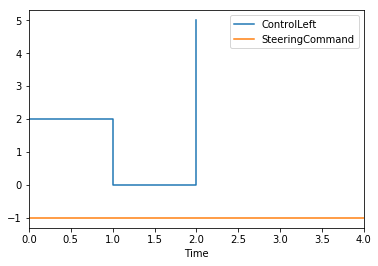

In [6]:
plotColumns(df,['ControlLeft','SteeringCommand'],10)

In [0]:
df

,ControlLeftDate,ControlLeft,ControlRightDate,ControlRight,SteeringCommandDate,SteeringCommand
0,0,2,0,3,0,Sturing Links
1,1,0,3,2,3,Sturing Links
2,2,5,4,6,4,Sturing Links


In [0]:
df.assign(controlnumber = toNumber(df,'ControlPosition'))

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


IndexingError: ignored

In [0]:
df = pd.DataFrame({'a': [1, 2], 'b': [3, 4]})
df.assign(mean_a=df.a.mean(), mean_b=df.b.mean())

,a,b,mean_a,mean_b
0,1,3,1.5,3.5
1,2,4,1.5,3.5


In [0]:
BouwstenenVariableNames = ['ControlPosition', 'SteeringCommand',
                           'MotorCurrentActive']

def convertToNumber(dataframe, variableName):
  resultdf = dataframe[variableName]
  
  if (variableName == 'ControlPosition'):
    resultdf.loc[dataframe[variableName] == "Links in controle"] = -1
    resultdf.loc[dataframe[variableName] == "Rechts in controle"] = 1
    resultdf.loc[dataframe[variableName] == "Uit controle"] = 0
    
  if (variableName == 'SteeringCommand'):
    resultdf.loc[dataframe[variableName] == "Sturing Links"] = -1
    resultdf.loc[dataframe[variableName] == "Sturing Rechts"] = 1
    resultdf.loc[dataframe[variableName] == "Sturing Onbekend"] = 0
    
  if (variableName == 'MotorCurrentActive'):
    resultdf.loc[dataframe[variableName] == "Motorstroom Actief"] = 1
    resultdf.loc[dataframe[variableName] == "Geen Motorstroom"] = 0
    

def plotColumn(dataframe, variableName, ax):
  timeName = variableName + 'Date'
  if (variableName in BouwstenenVariableNames):
    convertToNumber(dataframe, variableName)
    #print(dataframe['ControlPosition'])
  dataframe.plot(drawstyle='steps-post',x=timeName,y=variableName, ax=ax)
  
def plotColumns(dataframe, variableNames, maxtime):
  df = dataframe.copy()
  ax = plt.gca()
  for variableName in variableNames:
    plotColumn(df, variableName, ax)
  xmin, xmax, ymin, ymax = plt.axis()
  print(xmin, xmax, ymin, ymax)
  ax.set_xlim(xmax = min(xmin+maxtime,xmax))
  plt.xlabel('Time')

In [26]:
plotColumns(df,['ControlLeft','SteeringCommand'],float(dt.timedelta(seconds = 3)))

TypeError: ignored

In [23]:
0.5 + dt.timedelta(seconds = 3)

TypeError: ignored

In [0]:
s=dt.timedelta(seconds = 3)

TypeError: ignored

## Nou

In [0]:
#Pintar l'energia respecte el temps
f = 'Switch01_Data.xlsx'
df = pd.read_excel(f)


In [0]:
Sw = [0,0,0,0,0]
filename = ['Switch01_Data.xlsx', 'Switch02_Data.xlsx','Switch03_Data.xlsx', 'Switch04_Data.xlsx', 'Switch05_Data.xlsx']

for i in range(5):
  df0 = pd.read_excel(filename[i],sheet_name = 0)
  df1 = pd.read_excel(filename[i],sheet_name = 1)
  df2 = pd.read_excel(filename[i],sheet_name = 2)
  df = pd.concat([df0,df1,df2],axis=1).dropna(axis="columns",how = "all")
  #df.count()
  Sw[i] = df

In [0]:
#Executar aquesta cel·la només si es vol reiniciar totes les particions de les dades en el vector newdf fetes.

numerolleig = 2 #Nombre d'esdeveniments de control de més als que s'accedeix en retallar les dades
midamax = 20000
newdf = 5*[midamax*[0]]

def get_event_info(swnum,tindex):
  global newdf
  
  if type(newdf[swnum][tindex]) == int:
    
    newdf2 = []
    aux1 = Sw[swnum]
    aux4 = aux1.iloc[:,0].dropna(axis="index",how="all")
    count_row = aux4.shape[0]
    count_col = aux1.shape[1]

    temps = tindex
    t = aux1['SteeringCommandDate'][temps]
    tnext = aux1['SteeringCommandDate'][temps+1+numerolleig]
    print(type(t),type(tnext))
    print(temps)
    for index in range(int(count_col/2)): #Itera columnes (dades)
      aux2 = aux1.iloc[:,index*2:index*2+2]
      #print(aux2)
      newdf2.append(aux2[(aux2.iloc[:,0]>= t)&(aux2.iloc[:,0]<tnext)].reset_index(drop=True))

    #print(newdf2)
    newdf[swnum][tindex] = pd.concat(newdf2, axis=1)
  
  return newdf[swnum][tindex]

In [36]:
event = get_event_info(3,125)
event['SteeringCommandDate'].dropna()

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
125


0   2019-04-03 22:23:01.288
1   2019-04-03 22:30:12.303
2   2019-04-03 22:57:42.014
Name: SteeringCommandDate, dtype: datetime64[ns]

In [0]:
#Tot aquesta cel·la s'ha d'executar junta si es volen imprimir les 

BouwstenenVariableNames = ['ControlPosition', 'SteeringCommand',
                           'MotorCurrentActive']
ctt = -5

def convertToNumber(dataframe, variableName):
  resultdf = dataframe[variableName]
  
  if (variableName == 'ControlPosition'):
    resultdf.loc[dataframe[variableName] == "Links in controle"] = -1+ctt
    resultdf.loc[dataframe[variableName] == "Rechts in controle"] = 1+ctt
    resultdf.loc[dataframe[variableName] == "Uit controle"] = 0+ctt
    
  if (variableName == 'SteeringCommand'):
    resultdf.loc[dataframe[variableName] == "Sturing Links"] = -1+ctt
    resultdf.loc[dataframe[variableName] == "Sturing Rechts"] = 1+ctt
    resultdf.loc[dataframe[variableName] == "Sturing Onbekend"] = 0+ctt
    
  if (variableName == 'MotorCurrentActive'):
    resultdf.loc[dataframe[variableName] == "Motorstroom Actief"] = 1+ctt
    resultdf.loc[dataframe[variableName] == "Geen Motorstroom"] = 0+ctt
    
def plotColumn(dataframe, variableName, shift, ax):
  
  timeName = variableName + 'Date'
  if (variableName in BouwstenenVariableNames):
    convertToNumber(dataframe, variableName)
  #dataframe[timeName] = dataframe[timeName]-shift
  #print(dataframe['MotorCurrentDate'])
  dataframe.plot(drawstyle='steps-post',x=timeName,y=variableName, ax=ax)
  
def plotDataframeColumns(dataframe, variableNames):
  df = dataframe.copy()
  ax = plt.gca()
  for variableName in variableNames:
    plotColumn(df, variableName, shift, ax)
  plt.xlabel('Time')
  
def plotEventColumns(dataframe, variableNames, passedtime=0.0001, timeshift=0):
  df = dataframe.copy()
  ax = plt.gca()
  shift = 0
  f = (dataframe['SteeringCommandDate'][1] - dataframe['SteeringCommandDate'][0])
  f2 = (dataframe['SteeringCommandDate'][2] - dataframe['SteeringCommandDate'][1])
  total = f + f2
  p1 = f/total
  p2 = f2/total
  
  for variableName in variableNames:
    plotColumn(df, variableName, shift, ax)
  xmin, xmax, ymin, ymax = plt.axis()
  print(xmin, xmax, ymin, ymax)
  shift = p1*(xmax-xmin)-0.00004
  ax.set_xlim(xmax = min(xmin+passedtime+shift,xmax+shift), xmin = xmin+shift)
  xmin, xmax, ymin, ymax = plt.axis()
  print(xmin, xmax, ymin, ymax)
  plt.xlabel('Time')
  
def plotEvent(swNum, eventNum, columnNames):
  event = get_event_info(swNum-1, eventNum)
  plotEventColumns(event,columnNames)